In [6]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data

df_city = pd.read_csv(city_data_to_load)
df_ride = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset

df_ride_data = pd.merge(df_ride, df_city, on="city")

# Display the data table for preview

df_ride_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


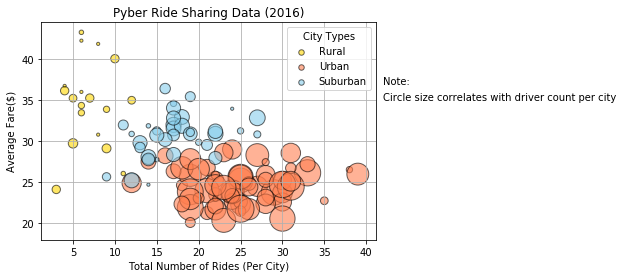

In [7]:
df_grp_rural = df_ride_data.loc[df_ride_data["type"]=="Rural"].groupby(["city"])
df_grp_urban = df_ride_data.loc[df_ride_data["type"]=="Urban"].groupby(["city"])
df_grp_suburban = df_ride_data.loc[df_ride_data["type"]=="Suburban"].groupby(["city"])

df_grp_rural["driver_count"].unique()
s = [s*10 for s in df_grp_rural["driver_count"].unique()]



plt.scatter(df_grp_rural["type"].count(),  df_grp_rural["fare"].mean(), c="gold", marker="o",edgecolors="black",
            s=[s*10 for s in df_grp_rural["driver_count"].unique()], alpha=0.6, label="Rural", linewidth=1)

plt.scatter(df_grp_urban["type"].count(),df_grp_urban["fare"].mean(),  c="Coral", marker="o",edgecolors="black",
            s=[s*10 for s in df_grp_urban["driver_count"].unique()], alpha=0.6, label = "Urban", linewidth=1)

plt.scatter(df_grp_suburban["type"].count(),  df_grp_suburban["fare"].mean(), c="SkyBlue", marker="o",edgecolors="black",
            s=[s*10 for s in df_grp_suburban["driver_count"].unique()], alpha=0.6, label = "Suburban", linewidth=1)

#plt.legend(plt.scatter.legend_elements(prop="sizes", alpha=0.6), title="City Types")

lgnd=plt.legend(title="City Types")
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

plt.grid()

plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare($)")

plt.title('Pyber Ride Sharing Data (2016)')

plt.text(42, 37, "Note:")
plt.text(42, 35, "Circle size correlates with driver count per city")


plt.savefig("../Images/Pyber_Ride_Sharing_Data_2016.png")
plt.show()



## Bubble Plot of Ride Sharing Data

In [2]:
# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure


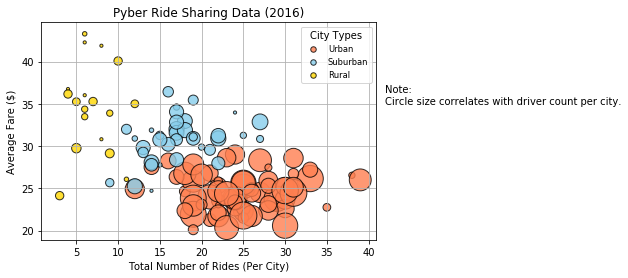

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

In [8]:
# Calculate Type Percents

df_fares_by_city_type = df_ride_data.groupby(["type"]).fare.sum().reset_index().sort_values("type",ascending=True)


df_fares_by_city_type

# Build Pie Chart

# Save Figure


,type,fare
0,Rural,4327.93
1,Suburban,19356.33
2,Urban,39854.38


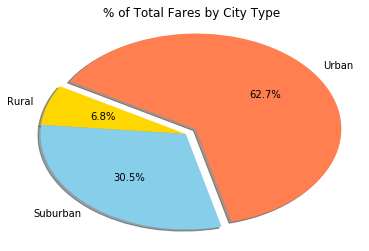

In [10]:
colors = [ "gold", "SkyBlue", "coral"]

explode = (0, 0, 0.1)

plt.pie(df_fares_by_city_type["fare"], explode=explode, labels=df_fares_by_city_type["type"], colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150, radius =1.15)

plt.title('% of Total Fares by City Type')
plt.axis("tight")

plt.savefig("../Images/Percent of Total Fares by City Type.png")
plt.show()   




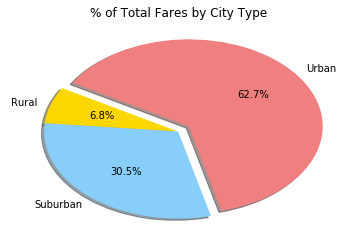

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

In [11]:
# Calculate Ride Percents
df_rides_by_city_type = df_ride_data.groupby(["type"]).ride_id.count().reset_index().sort_values("ride_id",ascending=True)


df_rides_by_city_type

# Build Pie Chart

# Save Figure


,type,ride_id
0,Rural,125
1,Suburban,625
2,Urban,1625


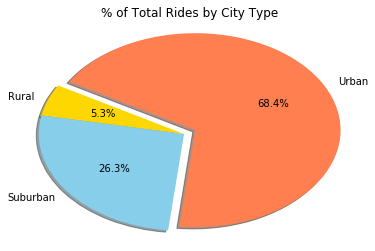

In [12]:
colors = [ "gold", "SkyBlue", "coral"]

explode = (0, 0, 0.1)

plt.pie(df_rides_by_city_type["ride_id"], explode=explode, labels=df_rides_by_city_type["type"], colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150, radius =1.15)

plt.title('% of Total Rides by City Type')
plt.axis("tight")

plt.savefig("../Images/Percent of Total Rides by City Type.png")
plt.show()


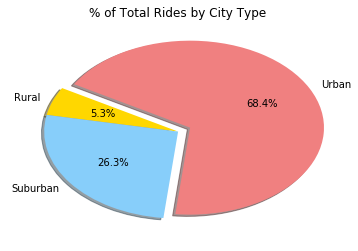

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [13]:
# Calculate Driver Percents
df_drivers_by_city_type = df_city.groupby(["type"]).driver_count.sum().reset_index().sort_values("driver_count",ascending=True)
df_drivers_by_city_type

#df_rides_by_city_type

# Build Pie Charts

# Save Figure


,type,driver_count
0,Rural,78
1,Suburban,490
2,Urban,2405


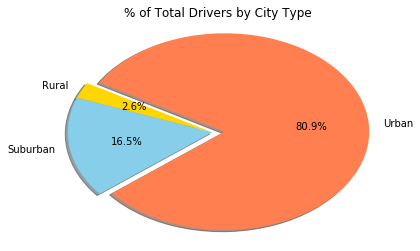

In [14]:
colors = [ "gold", "SkyBlue", "coral"]

explode = (0, 0, 0.1)

plt.pie(df_drivers_by_city_type["driver_count"], explode=explode, labels=df_drivers_by_city_type["type"], colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150, radius =1.15)

plt.title('% of Total Drivers by City Type')
plt.axis("tight")

plt.savefig("../Images/Percent of Total Drivers by City Type.png")
plt.show()


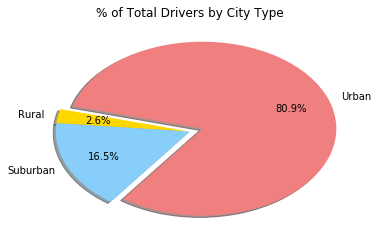

In [6]:
# Show Figure
plt.show()

In [ ]:
#Observations

# 1)  Densely populated areas tend to have more rides, but at lower fares (shorter distance?);  
#          conversely, less populated ares tend to have less drivers and rides, but with larger fares (longer distance?).

# 2)  While our drivers are concentrated in urban areas, there are less rides for the drivers to share.  
#        Suburban and rural drivers porportiontely get more rides than urban drivers

# 3)  This trend follows through to the fares by city.   Urban drivers are proportionally taking in less fares compared to
#       their Suburban counterparts

#  Overall I would say there may be an opportunity to increase fares by adding drivers in the Suburban markets where there 
#       currently are less competition and drivers are more utilized.   
